<a href="https://colab.research.google.com/github/SamWachira/Language-Identification-Classification-Hackathon/blob/main/MovieRecommendation_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning Solution
### EDSA - Movie Recommendation 2022 
#### AI Incorporated - Team NM5

© Explore Data Science Academy

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2Fbca114f2e4f6b9b46f2cc76527d7401e%2FImage_header.png?generation=1593773828621598&alt=media" width=100%/> 

<a id="cont"></a>
## Table of Content

<a href=#one>1. Introduction</a>
       
<a href=#two>1. Import Packages</a>

<a href=#three>2. Load Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    
<a href=#five>5. Data Processing</a>

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Modelling</a>

<a href=#eight>8. Model Performance</a>

<a href=#nine>9. Saving & Exporting Model</a>

<a href=#ten>10. Conclusion</a>

<a href=#eleven>11. Recommendation</a>

<a href=#ref>Reference Document Links</a>

<a id="one"></a>
# 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>

#### 1.1 Overview

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

Hence, We will be constructing a recommendation algorithm based on `Content` and `Collaborative` filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

<img src="https://miro.medium.com/max/1400/1*odvftNNQJp3O6vpwmZsJOQ.png" width=50%/> 

#### 1.2 Problem Statement

YouTube, FaceBook, Twitter, NetFlix, Amazon, Linkedin, Google are all leading businessess in the world today and all this gaints all have one thing in common, YES!!!, you got it; a recommendation machine. In this era of Artifical Intelligence, Everthing from the Government to Education down to the ever growing entertainment industry are so interconnected and now realies heavily on AI technology to boost their Efficiency. 

Hence, we will be building an accurate and robust model to this challenge of immense economic potential, with users of our clients system being able to recieving personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

#### 1.3 Model Versioning with COMET

To Begin with, We will be using Comet, a great tool for model versioning and experimentation as it records the parameters and conditions from each of your experiements- allowing us to reproduce your results, or go back to a previous version of our experiment.

In [ ]:
# # Install Comet
# !pip install comet_ml

In [ ]:
# Import Comet package
from comet_ml import Experiment

# Setting the API key

experiment = Experiment(
    api_key="LOfWnyJWVQ0yynqkHLhoe1J2B",
    project_name="movie-recommender-systems-team-4",
    workspace="moreira",
    log_code=True,
    log_graph=True,
    auto_param_logging=True,
    auto_metric_logging=True
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.com/moreira/movie-recommender-systems-team-4/3394f8623aaa4dff9beee62312f95361



####  1.4 Required Installations

In [ ]:
# !pip install surprise

In [ ]:
# !pip install fuzzywuzzy

In [ ]:
# !pip install WordCloud

In [ ]:
# !pip install cufflinks

In [ ]:
# !pip install plotly

#### 1.5 Our Approach

![1*rCK9VjrPgpHUvSNYw7qcuQ@2x.png](https://miro.medium.com/max/1000/1*rCK9VjrPgpHUvSNYw7qcuQ@2x.png)

Recommender systems encompass a class of techniques and algorithms that can suggest 'relevant' items to users, in this case, movies. They pedict future behaviour based on past data and a combination of multiple algorithms.

We will commence by builing;

* A `Content-Based Recommendation System` which basically entails computing the similarity between items(`movies`) using the consine similarity to plot similarity matrix between movies and similiaarity in content expressed as movie index. meaning we will be considering `Item Contents` such as (Tags, Keyword, Cast, Genre, the nitigrities etc) 

* Then Several `Collaborative Filtering Recommendation Systems` which harness all `Past data` of user interactions with the movies they have watch and ratings they have made both directly (actually rating the movie) or indirectly (i.e how long they dwelled on the movie).

So, Let's Proceed

<a id="two"></a>
# 2. IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>

In this section, we will be importing libraries which are a collections of modules in their classes and based on their functionality. For this Analysis and Modelling, we wil be requiring;

   ` For Data Manupulation, libraries such as Pandas, Numpy etc.`
   
`For Data Visualization, libraries such as mathplotlib, seaborn`
    
`libraries for data prepartion, feature selection, model building, Performance Calculation and more.`

**SEE** in-line comments BELOW for purpose per importation.

In [ ]:
""" 
For a seamless run, 
All required libraries will be imported here. 
"""

# Libraries for data loading, data manipulation and data visulisation
import pandas as pd                                                   # <-- for loading CSV data
import numpy as np                                                    # <-- Used for mathematical operations
import matplotlib.pyplot as plt                                       # <-- for Graphical Representation                                                 
import seaborn as sns                                                 # <-- for specialized plots            
import datetime
import scipy as sp                                                    # <-- Used in our code for numerical efficientcy. 
import plotly.express as px                                           # <-- for specialized plots  
from PIL import Image
from wordcloud import WordCloud, STOPWORDS                            # <-- To Check most pertinent parts of textual data
sns.set()                                                             # <-- set plot style

# Libraries for data preparation
from datetime import datetime
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet

# Libraries for featurization and similarity computation
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from fuzzywuzzy import fuzz

# Libraries for Model Building
import surprise
from surprise import Reader, Dataset, SVD
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.model_selection import GridSearchCV

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import operator  
import heapq
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import SVD, BaselineOnly, CoClustering, NMF
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Libraries used during sorting procedures.
import operator                                                       # <-- Convienient item retrieval during iteration 
import heapq                                                          # <-- Efficient sorting of large lists

# Libraries for calculating performance metrics
import time
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise import accuracy

# Libraries to Save/Restore Models
import pickle                                                         # <-- To Export Model
from surprise import dump                                             # <-- Aids dump model to be saved as PKL.
import os

import gc                                                             # <-- Gabage Collector
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

<a id="three"></a>
# 3. Load Data
<a href=#cont>Back to Table of Contents</a>

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.

We'll be using this special version of the MovieLens dataset which is enriched with additional data, and resampled for fair evaluation purposes.

**Source**

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

**Supplied Files**

* `genome_scores.csv` - a score mapping the strength between movies and tag-related properties.
* `genome_tags.csv` - user assigned tags for genome-related scores
* `imdb_data.csv` - Additional movie metadata scraped from IMDB using the links.csv file.
* `links.csv` - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* `sample_submission.csv` - Sample of the submission format for the hackathon.
* `tags.csv` - User assigned for the movies within the dataset.
* `test.csv` - The test split of the dataset. Contains user and movie IDs with no rating data.
* `train.csv` - The training split of the dataset. Contains user and movie IDs with associated rating data.

Kindly Make Reference to [Kaggle](https://www.kaggle.com/competitions/edsa-movie-recommendation-2022/data) for More Information asa concern the data.

In [ ]:
# #Kaggle setup
# ! pip install -q kaggle

# from google.colab import  files
# files.upload()

# #Create Kaggle Folder
# !mkdir ~/.kaggle
# #Copy Kaggle.json file to new folder
# ! cp kaggle.json ~/.kaggle/
# #Grant Permissions
# ! chmod 600  ~/.kaggle/kaggle.json
# #Datasets List
# ! kaggle datasets list

In [ ]:
# #Download dataset
# ! kaggle competitions download -c edsa-movie-recommendation-2022

# #Unzip datasets
# ! mkdir datasets
# !unzip  edsa-movie-recommendation-2022.zip

In [ ]:
# Load Base Train & Test Data locally
train_df_act = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r'test.csv')

# # From Kaggle
# train_df = pd.read_csv(r'train.csv')
# test_df = pd.read_csv(r'test.csv')

In [ ]:
# Load Meta Data locally
genome_scores_df = pd.read_csv('genome_scores.csv')
genome_tags_df = pd.read_csv('genome_tags.csv')
imdb_data_df = pd.read_csv('imdb_data.csv')
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
tags_df = pd.read_csv(r'tags.csv')

# # from Kaggle
# genome_scores_df = pd.read_csv('genome_scores.csv')
# genome_tags_df = pd.read_csv('genome_tags.csv')
# imdb_data_df = pd.read_csv('imdb_data.csv')
# links_df = pd.read_csv('links.csv')
# movies_df = pd.read_csv('movies.csv')
# tags_df = pd.read_csv(r'tags.csv')

<a id="four"></a>
# 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. On the following EDA we will explore the **MovieLens Dataset** to check for insight. We will be carrying out an extensive data analysis, descriptive statistics and data visualisations, all in the bid to give us an idea of what useful part of the data will be preprocessed in the Data Processing & feature engineering section in preparation for modeling. 

##### 4.1 Review Loaded Data

This first and the most important step in this project as a proper understanding on the data available will increase the chances of what we can do with it.

In [ ]:
train_df_act.head(3)

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539

Our Base training Model Includes `userId`, `movieId` , `rating` , `timestamp`. All features are relevant to a variable degree, but we can't make conclusive decisions yet

Average rating in dataset: 3.5333951730983424


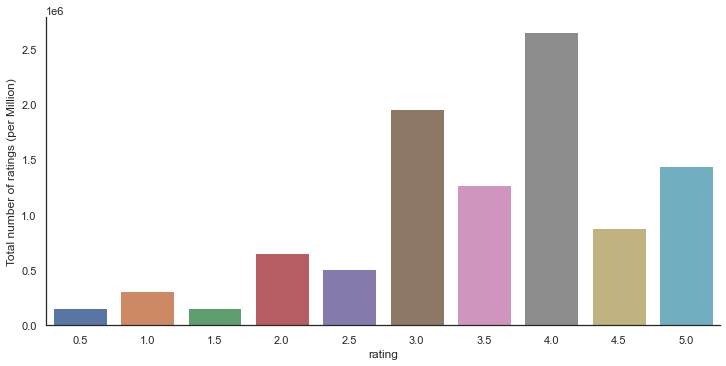

In [ ]:
# Let's Visualise the Distribution of Rating in our Actual Train Data
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=train_df_act, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings (per Million)")
print (f'Average rating in dataset: {np.mean(train_df_act["rating"])}')

In [ ]:
# Establishing Range of Ratings
min_rating = train_df_act.rating.min()
max_rating = train_df_act.rating.max()
print(f'The RATING ranges between {min_rating} and {max_rating}')

The RATING ranges between 0.5 and 5.0


So we have our ITEM (Movies) rating ranging between `0.5` to `5.0` and most likely to be the target feature for Basic Recommendation i.e. if we are to recommend based on `userId` and `movieId` iteractions alone. 

Also as we can see, majority of our Observations fall within the RATING range of `3.0` and `5.0` with `4.0` having the highest occurance with over `2.6 Million rating occurance`. This means that modelling by rating alone will not be entirely be representative of what the viewer may want since majority of ratings fall within the higher rates. Movie Contents/Types, User Preferences and other collaborative options, will have to be called into actions as distinguishing factor to tailoring down a recommendation to a user specification, which is what we want.

In [ ]:
# Check the shape/sizes of the data sets
"""" 
Creating a DataFrame which outlines the sizes of each of our data
"""

# List Names of Data sets
D_names = ['Train Data', 'Test Data','Genome Score', 'Tags Data', 
       'links Data', 'Movies Data', 'IMDB Data', 'Genome Tags' ]
# Generate a list of each data size
sizes = [len(train_df_act), len(test_df), len(genome_scores_df), 
         len(tags_df), len(links_df), len(movies_df), len(imdb_data_df),
         len(genome_tags_df), ]
# Place & view result in Pandas DataFrame
size_df = pd.DataFrame(list(zip(D_names, sizes)), columns=['Data', 'Size'])
size_df

Data      Size
0    Train Data  10000038
1     Test Data   5000019
2  Genome Score  15584448
3     Tags Data   1093360
4    links Data     62423
5   Movies Data     62423
6     IMDB Data     27278
7   Genome Tags      1128

In [ ]:
# Let's Visualize DataSet against Sizes

fig = px.bar(size_df, x=size_df['Data'], y=size_df['Size'],
             color=size_df['Data'],
             title='Available Datasets and Sizes')
fig.show()

We have Available a wooping `10 million plus` observations for training & validation, and `5 Million plus` of Test data to act as Unseen/Real world Test case.

`Genome Scores` which is a score mapping the strength between movies and tag-related properties being over `15 Million Plus` in size. This is a whole lot of Data set to manipulate through; First relating the Database, Cleaning and Processing it and finally modelling, for which each model generates its own form of sparse matrix, factorizing the interactions between the relevant features and proferring the desired recommendation. This will no doubt be computationally intensive. e.g assumming each feature in the genome score were to be applied and a sparse matrix were to be created between the features, we will be looking at a matrix in the shape of 15 million x 15 million, Now that is prior to integrating it to other tables. This is alot and have to be managed with utmost care. 

We will have to adopt some form of `DIMENSIONALITY REDUCTION` to Reducing the number of features but yet retaining the data integrity( No Loss in Insight to a reasonable Degree)

Let's Lokk at some relevant availble dataset first adopt what features are essential to our operation

In [ ]:
"""
Reviewing Dataset
"""
# To enable us view the full value of dataframe
pd.set_option('display.max_colwidth', -1)     

# View the first 5 entries in each dataset
print('TRAIN DATA TABLE'), display(train_df_act.head())
print('MOVIES DATA TABLE'), display(movies_df.head())
print('IMDB DATA TABLE'), display(imdb_data_df.head())
print('TAG DATA TABLE'), display(tags_df.head())

TRAIN DATA TABLE


userId  movieId  rating   timestamp
0  5163    57669    4.0     1518349992
1  106343  5        4.5     1206238739
2  146790  5459     5.0     1076215539
3  106362  32296    2.0     1423042565
4  9041    366      3.0     833375837

MOVIES DATA TABLE


movieId                               title  \
0  1        Toy Story (1995)                     
1  2        Jumanji (1995)                       
2  3        Grumpier Old Men (1995)              
3  4        Waiting to Exhale (1995)             
4  5        Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Children|Fantasy                   
2  Comedy|Romance                               
3  Comedy|Drama|Romance                         
4  Comedy

IMDB DATA TABLE


movieId  \
0  1         
1  2         
2  3         
3  4         
4  5         

                                                                                                                                                                                                                          title_cast  \
0  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste                                  
1  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup   
2  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine                 
3  Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore                 
4  Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony      

              director  runtime       budget  \
0  John Lasseter        81.0     $30,000,000   
1  Jonathan Hensleigh   104.0    $65,000,000   
2  Mark Steven Johnson  101.0    $25,000,000   
3  Terry McMillan       124.0    $16,000,000   
4  Albert Hackett       106.0    $30,000,000   

                                                               plot_keywords  
0  toy|rivalry|cowboy|cgi animation                                           
1  board game|adventurer|fight|game                                           
2  boat|lake|neighbor|rivalry                                                 
3  black american|husband wife relationship|betrayal|mother son relationship  
4  fatherhood|doberman|dog|mansion

TAG DATA TABLE


userId  movieId               tag   timestamp
0  3       260      classic           1439472355
1  3       260      sci-fi            1439472256
2  4       1732     dark comedy       1573943598
3  4       1732     great dialogue    1573943604
4  4       7569     so bad it's good  1573943455

(None, None)

It's established that the THREE MOST Important Features here are the; `MovieId`, `UserId` and `Rating` Hence will look to Build on this

1. From the Movies Table:
Obviously the `genres` is will be an important ingredient to establish Movie Content; Viewers might be more interested in `Comedy` and not recommending movies having `ROMANCE` as a genre to CHILDREN. We could be sued for that. In Total we have availble over `62 thousand` distinct movies available for our training.

2. From the IMDB Table: 
we can see, People/Users may tend to watch movies based on their `CAST` or `Director` but predominately the CAST and most people may be drawn to more `fight` oriented movies than `cowboy` or `animation`. Thus We will look to pick the `Title_cast` & `plot_keywords` Columns as potential features

3. The `Timestamp` might prove important as varying individuals will tend to view certain `tag` of movies at unique times and as such we should have our model providing recommendation to suit the TIMING (Think of HORROR movies and Night-times). This table may be having good info that could positively influence our training model

That been said, Let's go into more statistical Review of our Dataset.

In [ ]:
# Some Descriptive Stats of our base train data
round(train_df_act['rating'].describe(), 1)

count    10000038.0
mean     3.5       
std      1.1       
min      0.5       
25%      3.0       
50%      3.5       
75%      4.0       
max      5.0       
Name: rating, dtype: float64

A Maximum of 25% of our viewers will tend to rate movies below 3.0 `i.e over 75% of People, according to our stats will tend to rate a movie above 3.0`. This is also visualized in the `RATING DISTRIBUTION BAR GRAPH`

In [ ]:
'''
NEXT: Let's Count the Unique Characters for our features of Interest
'''

# Declare count of unique entries for features
unique_users = len(train_df_act['userId'].unique().tolist())
unique_movies = len(movies_df['movieId'].unique().tolist())
unique_actors = len(imdb_data_df['title_cast'].unique().tolist())
unique_directors = len(imdb_data_df['director'].unique().tolist())
unique_Movie_tags = len(tags_df['tag'].unique().tolist())

# Output Result in Dataframe
unique_characters = pd.DataFrame({"Users": [unique_users],
                                  "Tags" : [unique_Movie_tags],
                                  "Movies": [unique_movies],
                                  "Actors" : [unique_actors],
                                  "Directors" : [unique_directors],
                                 }, 
                                index=['Count of Unique Characters'])

# Print result
display(unique_characters.transpose())

Count of Unique Characters
Users      162541                    
Tags       73051                     
Movies     62423                     
Actors     17144                     
Directors  11787

For our experiment; we have a total of `162,541` participants in the rating of `62,423` unique movies. This is a pinch of vast number of movies and possible users but this is a reasonable satisfactory to fulfil the agenda of this project which to Model a Recommendation Machine which acts based on several conditions to tailoring down recommendations to suit each user.

Let's EXPLORE FURTHER on our USER, ITEM, and possibly TIMING or any other factor of great light. The scope this EDA is really vast and not limited to the reasearch as recorded on this NOTEBOOK.

#### Further about our USERS

In [ ]:
## Grouping users by count within range

##Create DataFrame with count by userID
user_count = pd.DataFrame(train_df_act['userId'].value_counts()).reset_index()
user_count.rename(columns={'index':'userId','userId':'count'}, inplace=True)

# Defining Group Between 1 - 50
first_group = user_count.loc[(user_count['count'] > 0) &                     
            (user_count['count'] < 50), 'userId'].value_counts().sum()
# Between 50 - 500
second_group = user_count.loc[(user_count['count'] >= 50) &  
            (user_count['count'] < 500), 'userId'].value_counts().sum()
# Between 500 - 1000
third_group = user_count.loc[(user_count['count'] >= 500) & 
            (user_count['count'] < 1000), 'userId'].value_counts().sum()
# Between 1000 - 1500
fourth_group = user_count.loc[(user_count['count'] >= 1000) & 
            (user_count['count'] < 1500), 'userId'].value_counts().sum()
# From 1500 above
fifth_group = user_count.loc[(user_count['count'] >= 1500),
            'userId'].value_counts().sum()

# To give us insight in the spread, we used figures to determine the spread.
trial_error = np.array([['First Group', first_group, 'Between 1 and 50'],
                        ['Second Group', second_group, 'Between 50 and 500'],
                        ['Third Group', third_group, 'Between 500 and 1000'],
                        ['Fourth Group', fourth_group, 'Between 1000 and 1500'],
                        ['Fifth Group', fifth_group, 'Greater than 1500']])

# Place array into Dataframe
trial_error_df = pd.DataFrame({'UserId Voting Group': trial_error[:, 0],
                               'Number per Group': trial_error[:, 1],
                               'Group Category': trial_error[:, 2]})
# Plot Bar Graph of Groupings
fig = px.bar(trial_error_df, x=trial_error_df["UserId Voting Group"], 
             y=trial_error_df["Number per Group"], color=trial_error_df["UserId Voting Group"], 
             title='Users Rating Distribution')
fig.show()
trial_error_df

UserId Voting Group Number per Group         Group Category
0  First Group         110010           Between 1 and 50     
1  Second Group        50973            Between 50 and 500   
2  Third Group         1338             Between 500 and 1000 
3  Fourth Group        159              Between 1000 and 1500
4  Fifth Group         61               Greater than 1500

From the above; we can see out of `162,541` participants; `Over 110,000 of them Rated below 50 times` which is over 67% of the the participants. Meaning, which is as representative as whats occuring in reality as just about `33% of people who see a movie will tend to Rate them`, we are assuming, rating over 50 movies for a given season will be termed ACTIVE. This is purely a Hypothetical, based on this data and should pass over several hypothesis testing to factualize this looming facts.

What this simply means; `You are most likely to get feedbacks from 33% of your Customers`.

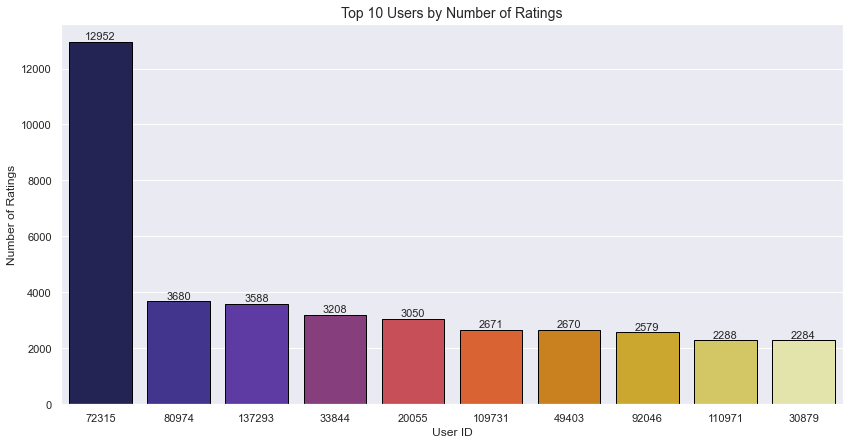

In [ ]:
# Define Function that Reveals Users with Top Counts of Ratings
def user_ratings_count(df, n):
    plt.figure(figsize=(14,7))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    plt.show()

user_ratings_count(train_df_act,10)

Here we intended finding out our top contributors and above is our result; 

Our Top Users each rated on an average of about `2900 Times` except for User with `ID: 72315`. It's eitherour User with `ID: 72315` Practically spends his/her time on movies and rating them or we have some form of an Outlier here.  We wil assume this to be an Outlier, hence removing Rows having this Users contribution. SEE Data Processing for Execution.

#### Further about our MOVIES

Using the Train Data as Base let's seive out just whats needed from other Movies & Metadata to trim off alot of Excess data. Recall we have to deal with space and computational challanges. This will fit every essential inot the 10 million Observations,. This is still alot to deal with, but its a good start.  

First we Merge our Movie Title & Genres from our movie Table to Our Base Train Data.

In [ ]:
# Let us merge our train data with the movies data

pd.set_option('display.max_colwidth', -1)   # To enable us view the full value of dataframe
movies = pd.merge(train_df_act, movies_df, on='movieId', how='left')
movies.head()

userId  movieId  rating   timestamp  \
0  5163    57669    4.0     1518349992   
1  106343  5        4.5     1206238739   
2  146790  5459     5.0     1076215539   
3  106362  32296    2.0     1423042565   
4  9041    366      3.0     833375837    

                                                                                    title  \
0  In Bruges (2008)                                                                         
1  Father of the Bride Part II (1995)                                                       
2  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)                                      
3  Miss Congeniality 2: Armed and Fabulous (2005)                                           
4  Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)   

                          genres  \
0  Comedy|Crime|Drama|Thriller     
1  Comedy                          
2  Action|Comedy|Sci-Fi            
3  Adventure|Comedy|Crime          
4  Drama|Horror|Mystery|Thriller   

                                                                             Title  
0  In Bruges                                                                        
1  Father of the Bride Part II                                                      
2  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2)                                     
3  Miss Congeniality 2: Armed and Fabulous                                          
4  Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A)

NEXT: we add our Cast, Director, runtime, budget and Plot_keywords from our IMDB DATA into our MAIN TRAIN DATA

In [ ]:
# We will add an additional data i.e df_imdb data
complete_movie = pd.merge(movies, imdb_data_df[['movieId', 'title_cast', 
                                                'director', 'plot_keywords']], 
                                                  on='movieId', how='left')
complete_movie.head(2)

userId  movieId  rating   timestamp                               title  \
0  5163    57669    4.0     1518349992  In Bruges (2008)                     
1  106343  5        4.5     1206238739  Father of the Bride Part II (1995)   

                        genres  \
0  Comedy|Crime|Drama|Thriller   
1  Comedy                        

                                                                                                                                                                                                                       title_cast  \
0  Elizabeth Berrington|Rudy Blomme|Olivier Bonjour|Mark Donovan|Ann Elsley|Colin Farrell|Jean-Marc Favorin|Ralph Fiennes|Brendan Gleeson|Eric Godon|Zeljko Ivanek|Sachi Kimura|Anna Madeley|Louis Nummy|Clémence Poésy             
1  Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony   

          director                    plot_keywords  
0  Martin McDonagh  dwarf|bruges|irish|hitman        
1  Albert Hackett   fatherhood|doberman|dog|mansion

NEXT: Let's Proceed to seeing the movies with the Highest Ratings and also check for possible outliers in our dataset 

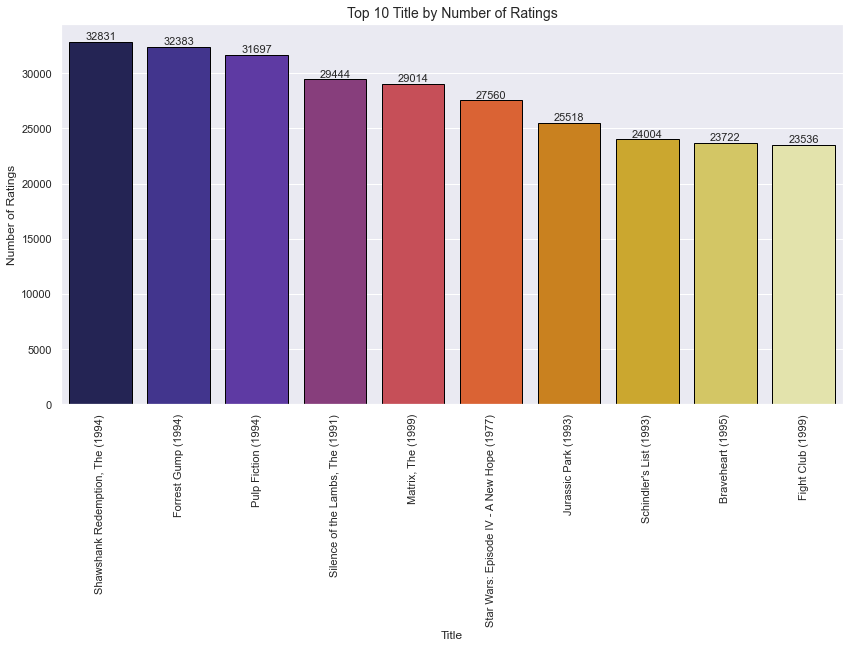

In [ ]:
# Get the top ratings of movies

# Define the Function
def top_rating_plot(df,column, n):
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel(column.title())
    plt.ylabel('Number of Ratings')
    plt.xticks(rotation=90)
    plt.show()
# Call Function; Get Top 10
top_rating_plot(movies,'title',10)

This reveals that all the movies in the top 10 by Number of Ratings were released in the 90's with only one Indicating certain likeness for users to this class of classical movies.


#### Exploring Further on Genre Categories

In [ ]:
# Get the categories of Movie Genre per movie ID.
# Each Genre should stand unique to enable classification
movie_genres = pd.DataFrame(movies_df['genres'].str.split("|").tolist(),
                      index=movies_df['movieId']).stack()
movie_genres = movie_genres.reset_index([0, 'movieId'])
movie_genres.columns = ['movieId', 'Genre']
movie_genres.head()

movieId      Genre
0  1        Adventure
1  1        Animation
2  1        Children 
3  1        Comedy   
4  1        Fantasy

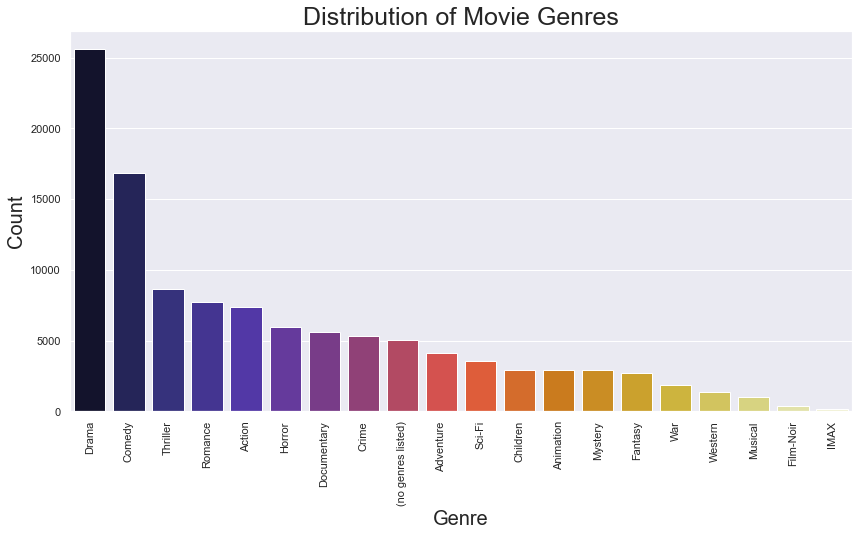

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre', data=movie_genres, palette='CMRmap',
              order=movie_genres['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

Mere looking at the graph, we can tell that `Drama, Comedy, Thriller and Romance` stand out as the popular movie genres

Several factors attributes to why these genres stand out. Hence, Let us get an interesting wordcloud to showcase movie titles and the count of ratings to see if we could get any further insight on the movies

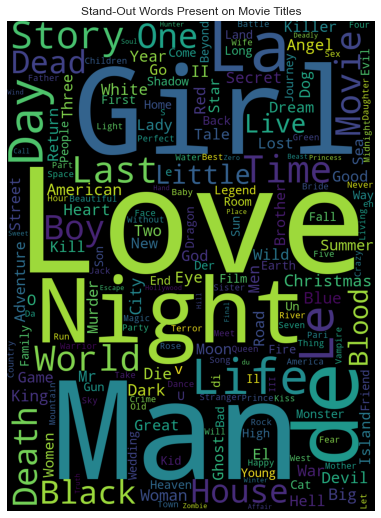

In [ ]:
# Wordcloud of movie titles
movie = movies_df['title'] = movies_df['title'].astype('str')
wordcloud = ' '.join(movie)
title_wordcloud = WordCloud(stopwords = STOPWORDS,background_color = 'Black',
                            height = 1200, width = 900).generate(wordcloud)
plt.figure(figsize = (14,7), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Stand-Out Words Present on Movie Titles')
plt.tight_layout(pad=0)
plt.show()

Obviously speaking; This simple means, Movies with words such as `LOVE`, `STORY`, `GIRL`, `MAN`, `NIGHT`, `LIFE`, gains more views and will tend to be rated more than others, and you know why; `SEX CONTENT`. No wonder there have been a marketing drive to paint any and every product with it in the past century. Well, Let's leave it at that. `It simply gets attention.`

#### More on our Time Stamps

You see, Cats hunt mostly at night for some reasons. Same goes for our Viewers, People will choose to watch certain kinds of moovies at certain hours, Day, or Month of the Year. As the saying Goes,` Now your customers, Own the Market`; So let's study the time series activities of our participants.

In [ ]:
#From movie data, convert timestamp to datetime
movies['time_dt'] = movies['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

# Extract year, month, day, day-of-week Respectively
movies['Year'] = movies['time_dt'].dt.year
movies['Month'] = movies['time_dt'].dt.month
movies['Day'] = movies['time_dt'].dt.day
movies['Day of Week'] = movies['time_dt'].dt.dayofweek

In [ ]:
# View DateTime Columns
movies.head(2)

userId  movieId  rating   timestamp                               title  \
0  5163    57669    4.0     1518349992  In Bruges (2008)                     
1  106343  5        4.5     1206238739  Father of the Bride Part II (1995)   

                        genres             time_dt  Year  Month  Day  \
0  Comedy|Crime|Drama|Thriller 2018-02-11 12:53:12  2018  2      11    
1  Comedy                      2008-03-23 03:18:59  2008  3      23    

   Day of Week  
0  6            
1  6

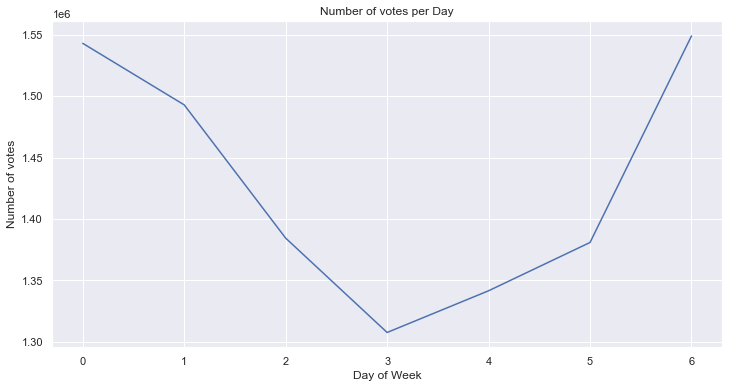

In [ ]:
# Group rating by Day-of-Week
dt = movies.groupby(['Day of Week'])['rating'].count().reset_index()
# Make a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['Day of Week'],dt['rating']); plt.xlabel('Day of Week'); plt.ylabel('Number of votes'); plt.title('Number of votes per Day')
plt.show()

Obviously; People will Tend to View and Rate Movies during the Weekends and if you are planning on making a movie release, Two advices;
* Never on MidWeek
* Target the Weekends

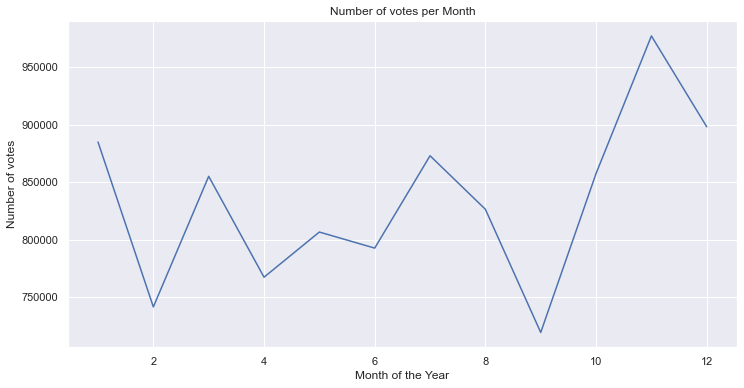

In [ ]:
# Group rating by Month
dt = movies.groupby(['Month'])['rating'].count().reset_index()
# Make a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['Month'],dt['rating']); plt.xlabel('Month of the Year') 
plt.ylabel('Number of votes'); plt.title('Number of votes per Month')
plt.show()

As we can see the `Ember Months` Have alot of people on the look out for Movies, From this analysis we can see a stip decline in votes which is as equal to Views, same for the month of August leading to September (The New Financial Year) and most people will be stock on setting their records straight, reports preparation and all that and might not be a good time for movies. 

We can see the Holiday Periods with the sharp peaks `Easter` and `The Summer break` i.e Students during summer are typically off between eight and nine weeks (late-June to early-September)

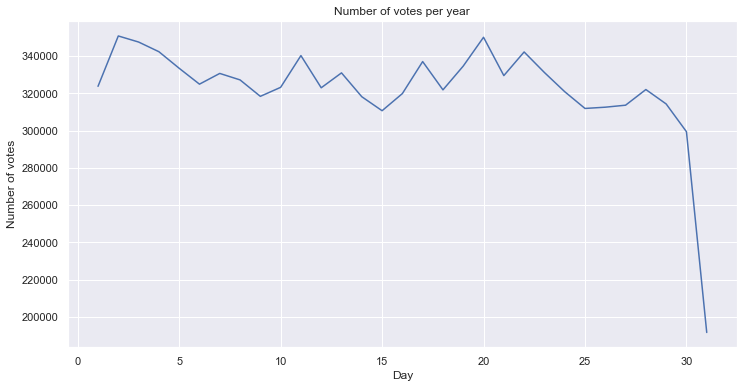

In [ ]:
# Group rating by DAY
dt = movies.groupby(['Day'])['rating'].count().reset_index()
# Make a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['Day'],dt['rating']); plt.xlabel('Day'); plt.ylabel('Number of votes'); plt.title('Number of votes per year')
plt.show()

There is a decline in movies viewed late in each months, could correspond with end of Subscription periods and also a period of less money in the hands of salary earners

#### Key Observations 
* RATING range of `3.0` and `5.0` with `4.0` having the highest occurance with over `2.6 Million rating occurance`
* THREE MOST Important Features here are the; `MovieId`, `UserId` and `Rating`, The rest will be built on them.
* A total of `162,541 participant` rated `62,423 unique movies`, out o which `110,010 rated < 50 times`
* You are most likely to get feedbacks from 33% of your Customers
* Possible Outlier of User ID: 72315
* People Tend to Love movies of the 90's or with similar contents.
* `Drama, Comedy, Thriller and Romance` stand out as the popular movie genres
* Titles & Items with Sex Contents proof to get Users attention
* Active periods include `Target the Weekends` and `Holiday sessons`



NOW, Armed with the knowledge of what our data constitute, let's proceed to making meaningful data processing required to accomplish our task.

<a id="five"></a>
## 5. DATA PROCESSING
<a href=#cont>Back to Table of Contents</a>

The primary funtion of data processing is to provide Cleaner, Functional, Higher-Quality data, which is key to any successesful of data engineering and model building. It also enable more valuable insights to be extracted as well. Hence, Let's get digging.

In [ ]:
#Checking for missing values in all datasets provided

# the values will be displayed in a dataframe
pd.set_option('display.max_colwidth', -1)     

# List Names of Data sets
names_c = ['Train Null Count', 'Test Null Count','Genome Score Null Count', 
           'Tags Null Count', 'links Null Count', 'Movies Null Count', 
           'IMDB Null Count', 'Genome Tags Null Count' ]
# Generate a list of each data size
null_count = [train_df_act.isnull().sum(), test_df.isnull().sum(), genome_scores_df.isnull().sum(), 
         tags_df.isnull().sum(), links_df.isnull().sum(), movies_df.isnull().sum(), 
         imdb_data_df.isnull().sum(), genome_tags_df.isnull().sum()]
# Place & view result in Pandas DataFrame
data_null_count = pd.DataFrame(list(zip(names_c, null_count)), columns=['Data', 'Null Count'])
data_null_count

Data  \
0  Train Null Count          
1  Test Null Count           
2  Genome Score Null Count   
3  Tags Null Count           
4  links Null Count          
5  Movies Null Count         
6  IMDB Null Count           
7  Genome Tags Null Count    

                                                                                                                                               Null Count  
0  userId       0
movieId      0
rating       0
timestamp    0
dtype: int64                                                                                
1  userId     0
movieId    0
dtype: int64                                                                                                                  
2  movieId      0
tagId        0
relevance    0
dtype: int64                                                                                               
3  userId       0 
movieId      0 
tag          16
timestamp    0 
dtype: int64                                                                            
4  movieId    0  
imdbId     0  
tmdbId     107
dtype: int64                                                                                               
5  movieId    0
title      0
genres     0
dtype: int64                                                                                                     
6  movieId          0    
title_cast       10068
director         9874 
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64  
7  tagId    0
tag      0
dtype: int64

###Insight on missing values
We have missing values in Tags, Links and IMDB dataframes. However, the respective dataframes are irrelevant to the dataframe of our nase model. So we consider the null values as noice that has no adverse effect on our model nd ignore the cleaning.

We will carryon on the "movies" daraframe that was created at the EDA stage

In [ ]:
#Checking out the movies data frame that will be used in creation of our base model.
movies.head(5)

userId  movieId  rating   timestamp  \
0  5163    57669    4.0     1518349992   
1  106343  5        4.5     1206238739   
2  146790  5459     5.0     1076215539   
3  106362  32296    2.0     1423042565   
4  9041    366      3.0     833375837    

                                                                                    title  \
0  In Bruges (2008)                                                                         
1  Father of the Bride Part II (1995)                                                       
2  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)                                      
3  Miss Congeniality 2: Armed and Fabulous (2005)                                           
4  Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)   

                          genres             time_dt  Year  Month  Day  \
0  Comedy|Crime|Drama|Thriller   2018-02-11 12:53:12  2018  2      11    
1  Comedy                        2008-03-23 03:18:59  2008  3      23    
2  Action|Comedy|Sci-Fi          2004-02-08 05:45:39  2004  2      8     
3  Adventure|Comedy|Crime        2015-02-04 10:36:05  2015  2      4     
4  Drama|Horror|Mystery|Thriller 1996-05-29 14:17:17  1996  5      29    

   Day of Week  
0  6            
1  6            
2  6            
3  2            
4  2

In [ ]:
'''
We are spliting the genres with a split function to have the words seperated
'''
# we call the split function with '|'
movies['genres'] = movies.genres.str.split('|')

In [ ]:
movies.head(5)

userId  movieId  rating   timestamp  \
0  5163    57669    4.0     1518349992   
1  106343  5        4.5     1206238739   
2  146790  5459     5.0     1076215539   
3  106362  32296    2.0     1423042565   
4  9041    366      3.0     833375837    

                                                                                    title  \
0  In Bruges (2008)                                                                         
1  Father of the Bride Part II (1995)                                                       
2  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)                                      
3  Miss Congeniality 2: Armed and Fabulous (2005)                                           
4  Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)   

                               genres             time_dt  Year  Month  Day  \
0  [Comedy, Crime, Drama, Thriller]   2018-02-11 12:53:12  2018  2      11    
1  [Comedy]                           2008-03-23 03:18:59  2008  3      23    
2  [Action, Comedy, Sci-Fi]           2004-02-08 05:45:39  2004  2      8     
3  [Adventure, Comedy, Crime]         2015-02-04 10:36:05  2015  2      4     
4  [Drama, Horror, Mystery, Thriller] 1996-05-29 14:17:17  1996  5      29    

   Day of Week  
0  6            
1  6            
2  6            
3  2            
4  2

###Spliting the title column into title and Production year columns
The title column has title of the film and year of production in brackets ie. Title(year). It would be more convenient for our modelling process if the title and production year are put in different columns.
Seperating them would equally help in filtering once the model is deployed. 

In [ ]:
'''
This function splits the title column into two different columns with title and production year
'''
def extract_title(title):

    year = title[len(title)-5:len(title)-1]
    if year.isnumeric():
        title = title[:len(title)-7]    

    else:
        title = title
        
    # if ', The' or ', A' is a the end of the string, move it to the front
    # e.g. change "Illusionist, The" to "The Illusionist"
    if title[-5:] == ', The':
        title = 'The ' + title[:-5]
    elif title[-4:] == ', An':
        title = 'An ' + title[:-4]
    elif title[-3:] == ', A':
        title = 'A ' + title[:-3]
    
    return title
    


'''
This function extracts the year from the original title column
'''
def extract_year(title):

    year = title[len(title)-5:len(title)-1]
    # NaN will be returned in the new production year column where the parent title column does not have an year in brackets.
    if year.isnumeric():
        return int(year)

    else:
        return 9999

In [ ]:
# Changing column name from title to title_year
movies.rename(columns={'title':'title_year'}, inplace=True) 
# remove leading and ending whitespaces in title_year
movies['title_year'] = movies['title_year'].apply(lambda x: x.strip()) 
 # create the column for title
movies['title'] = movies['title_year'].apply(extract_title)
# create the column for year
movies['prod_year'] = movies['title_year'].apply(extract_year) 

###Dealing with outliers
The EDA showed that there was anomalies with contributions made by user with ID:72315. The entries were marked as outliers. Tp prevent the contributions from affecting our base model, we remove the contributions by user with ID:72315

In [ ]:
#Dropping the contributions
print('BEFORE', movies.shape)
movies = movies[movies.userId != 72315]
print('AFTER', movies.shape)

BEFORE (10000038, 14)
AFTER (9987086, 14)


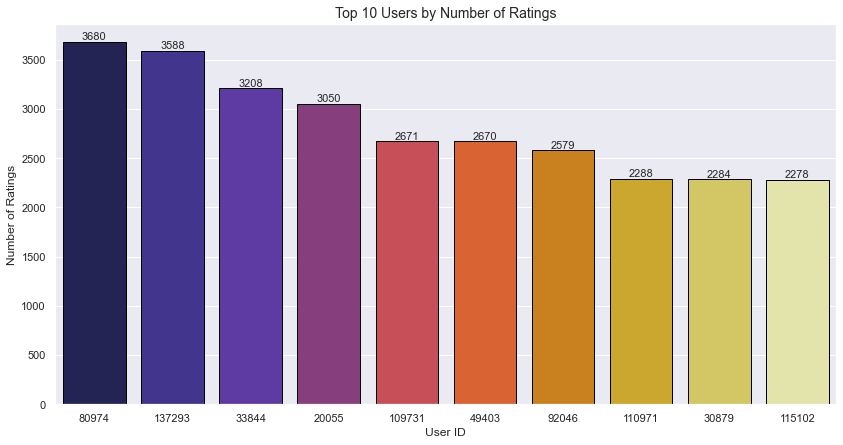

In [ ]:
#Using the function from EDA
user_ratings_count(movies, 10)

In [ ]:
# Checking the new dataframe
movies.head(3)

userId  movieId  rating   timestamp  \
0  5163    57669    4.0     1518349992   
1  106343  5        4.5     1206238739   
2  146790  5459     5.0     1076215539   

                                            title_year  \
0  In Bruges (2008)                                      
1  Father of the Bride Part II (1995)                    
2  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)   

                             genres             time_dt  Year  Month  Day  \
0  [Comedy, Crime, Drama, Thriller] 2018-02-11 12:53:12  2018  2      11    
1  [Comedy]                         2008-03-23 03:18:59  2008  3      23    
2  [Action, Comedy, Sci-Fi]         2004-02-08 05:45:39  2004  2      8     

   Day of Week                                         title  prod_year  
0  6            In Bruges                                     2008       
1  6            Father of the Bride Part II                   1995       
2  6            Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2)  2002

### Key Insights
* The addition of title and prod_year columns is important for content based filtering because it adds new features that are relevant in filtering. 
* Extra cleaning is not necessary to preserve key information from the dataset.  



#Note:
####From our initial approach as outlined in the introduction segment, we are using two approaches of Recommender Modelling. Collaborative filtering will use basic information in userId and movieId, while content based modelling will require key data such as the genre, title and title_year.

####For the scope of this project, we will pay focus with the key features relevant to our moddelling approach. 

<a id="six"></a>
## 6. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

In feature engineering, we will prepare clean and structured data that will be used for the modelling.

With the large dataset involved in this project, we are paying attention to the time and space complexity. We are going to use a representative sample of the dataset, with the assumption that the values in the features are normally distributed. 

In [ ]:
#Checking the average rating before sampling
before_sampling = np.mean(movies["rating"])
print (f'Average rating in Our Dataset BEFORE SAMPLING: {before_sampling}')

Average rating in Our Dataset BEFORE SAMPLING: 3.5339671151324823


In [ ]:
'''
This sampling is used to avoid the computational complexity. 
It can be igneored when there is enough computational power to run the entire dataset
'''

# Sampling out 0.2% the size of our Data population for the Experiment.
print('Shape of our Actual TRAIN Dataset', movies.shape)
movies2 = movies.sample(frac=0.01, random_state=42)
print('02 % of our TRAIN Dataset', movies2.shape)

Shape of our Actual TRAIN Dataset (9987086, 14)
02 % of our TRAIN Dataset (99871, 14)


###Through Sampling, we have obtained a sample of the dataset that has an approximate size od 20,000 observations

In [ ]:
# Resetting the indexes to start from zero after sampling
movies2.reset_index(drop=True, inplace=True)
# Check
movies2.head().index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
# #Checking the average rating before sampling
after_sampling = np.mean(movies2["rating"])
print (f'Average rating in Our Dataset AFTER SAMPLING: {after_sampling}')

Average rating in Our Dataset AFTER SAMPLING: 3.534459452693975


In [ ]:
# Drawing Comparison
print(f'Comparing both Average Rating, BEFORE = {before_sampling} and AFTER = {after_sampling}.')
print(' This proves the representative nature of our sample dataset.')

Comparing both Average Rating, BEFORE = 3.5339671151324823 and AFTER = 3.534459452693975.
 This proves the representative nature of our sample dataset.


In [ ]:
# The sampled dataframe
movies.head(2)

userId  movieId  rating   timestamp                          title_year  \
0  5163    57669    4.0     1518349992  In Bruges (2008)                     
1  106343  5        4.5     1206238739  Father of the Bride Part II (1995)   

                             genres             time_dt  Year  Month  Day  \
0  [Comedy, Crime, Drama, Thriller] 2018-02-11 12:53:12  2018  2      11    
1  [Comedy]                         2008-03-23 03:18:59  2008  3      23    

   Day of Week                        title  prod_year  
0  6            In Bruges                    2008       
1  6            Father of the Bride Part II  1995

#### Term Frequency and Inverse Document Frequency (tf-idf)

Machine learning algorithms often use numerical data, so when dealing with textual data, that data first needs to be converted to a vector of numerical data by vectorization. TF-IDF vectorization involves calculating the TF-IDF score for every word in your corpus relative to that document and then putting that information into a vector

The TfidVectorizer() class from the sklearn.feature_extraction.text library helps us to calculate the tf-idf scores for each genre in each movie.

In [ ]:
# create an object for TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english') 
# apply the object to the genres column
tfidf_matrix = tfidf_vector.fit_transform(movies['genres'].apply(lambda x: ' '.join(map(str, x)))) 

In [ ]:
# The list and order of genres used in the vectorization are as follows
print(list(enumerate(tfidf_vector.get_feature_names())))

[(0, 'action'), (1, 'adventure'), (2, 'animation'), (3, 'children'), (4, 'comedy'), (5, 'crime'), (6, 'documentary'), (7, 'drama'), (8, 'fantasy'), (9, 'fi'), (10, 'film'), (11, 'genres'), (12, 'horror'), (13, 'imax'), (14, 'listed'), (15, 'musical'), (16, 'mystery'), (17, 'noir'), (18, 'romance'), (19, 'sci'), (20, 'thriller'), (21, 'war'), (22, 'western')]


In [ ]:
# Let's see the examples of the vectorization for the first 5 movies.
print(tfidf_matrix[:5])

  (0, 20)	0.5091648019233765
  (0, 7)	0.40265424447114095
  (0, 5)	0.6148625445451087
  (0, 4)	0.44784463288870363
  (1, 4)	1.0
  (2, 9)	0.5601755667316222
  (2, 19)	0.5601755667316222
  (2, 0)	0.44947707764185874
  (2, 4)	0.4127675199774638
  (3, 1)	0.5799541388420878
  (3, 5)	0.6584937029457232
  (3, 4)	0.4796240611361801
  (4, 16)	0.6046800348718777
  (4, 12)	0.6154608829748329
  (4, 20)	0.3965306005997906
  (4, 7)	0.3135816317056106


From the tfidf_matrix result; The first argument in the index above is the same as the index in the dataframe `movies` (Representing the movie title: `In Bruges`), and the second argument represents and correspond to the index number of genres i.e `(0, 'action'), (1, 'adventure'), (3, 'children'),...(20, 'thriller')`. 

Example; `(0, 7)	0.6717085675151724` means that movie index = 0 (`In Bruges`), genre index = 7 (`drama`), and the `tf-idf score = 0.6717085675151724`. The tf-idf score of Drama movie **In Burges** is 0.6717085675151724. 


In [ ]:
# Check the Matrix Shape
tfidf_matrix.shape

(9987086, 23)

In [ ]:
# the first row vector of tfidf_matrix (Employee of the Month)
tfidf_matrix.todense()[0]

matrix([[0.        , 0.        , 0.        , 0.        , 0.44784463,
         0.61486254, 0.        , 0.40265424, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.5091648 , 0.        , 0.        ]])

**NEXT:**

let's caculate the similarity between two movies using the tf-idf matrix. The `cosine similarity` is used to calculate the similarity, and `linear_kernel()` class is used to calculate this.

In [ ]:
'''
There is a tendency of getting a Memory Error here
To advert this, Reduce/Resample your the movies data
to accommodate what your system can compute.

We advise attempt running full dataset ONLY on a Large
enough Cloud Instance e.g EC2. else REDUCE SAMPLE
'''

# create the cosine similarity matrix 
sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)
print(sim_matrix)

**sim_matrix <sub>i j</sub>** is the similarity score between **movie <sub>i</sub>** and **movie <sub>j</sub>**.Therefore, the diagonal elements in the matrix represent the similarity scores of a movie with itself, and therefore, the value should be 1. By the definition of the matrix, **sim_matrix <sub>i j</sub> = sim_matrix <sub>j i</sub>**

In [ ]:
# Load reader and data in surprise friendly format
reader = Reader(rating_scale=(0.5, 5))
train2 = Dataset.load_from_df(movies[['userId', 'movieId', 'rating']], reader)
train3 = Dataset.load_from_df(movies2[['userId', 'movieId', 'rating']], reader)

In [ ]:
%%time
# Baseline Only model

algo_b = BaselineOnly()

trainset, testset = train_test_split(train2, test_size = 0.1)

# train and test algorithm.
algo_b.fit(trainset)
predictions_b = algo_b.test(testset)

# Compute and print Root Mean Squared Error
base_pred = accuracy.rmse(predictions_b, verbose=True)

In [ ]:
%%time
# SVD model

algo_svd1 = SVD()

trainset, testset = train_test_split(train2, test_size = 0.1)

# train and test algorithm.
algo_svd1.fit(trainset)
predictions_svd = algo_svd1.test(testset)

# Compute and print Root Mean Squared Error
svd_pred = accuracy.rmse(predictions_svd, verbose=True)

In [ ]:
%%time
#Tune SVD hyperparameter
train_data = Dataset.load_from_df(movies[['userId', 'movieId', 'rating']], reader = reader)

trainset = train_data.build_full_trainset()

param_grid = {'n_epochs': [15, 50, 75, 100, 150],
'n_factors': [100, 200, 300],
'lr_all': [0.002, 0.004, 0.005],
'reg_all': [0.01,0.05,0.1, 0.4, 0.6]}

svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs = 1)

svd.fit(train_data)

print("RMSE score", svd.best_score['rmse'])

print("Best Parameters", svd.best_params['rmse'])

In [ ]:
%%time
# CoClustering model

algo_cc = CoClustering()

trainset, testset = train_test_split(train2, test_size = 0.1)

# train and test algorithm.
algo_cc.fit(trainset)
predictions_cc = algo_cc.test(testset)

# Compute and print Root Mean Squared Error
co_clus_pred = accuracy.rmse(predictions_cc, verbose=True)

In [ ]:
%%time
algo_nmf = NMF()

trainset, testset = train_test_split(train2, test_size = 0.1)

# train and test algorithm.
algo_nmf.fit(trainset)
predictions_nmf = algo_nmf.test(testset)

# Compute and print Root Mean Squared Error
nmf_pred = accuracy.rmse(predictions_nmf, verbose=True)

In [ ]:
fig,axis = plt.subplots(figsize=(10, 6))
x1 = ['Baseline Only', 'SVD', 'Co-Clustering', 'NMF']
y1 = [base_pred, svd_pred, co_clus_pred, nmf_pred]
g = sns.barplot(x= x1, y= y1)
axis.bar_label(axis.containers[-1], fmt='Mean:\n%.2f', label_type='center')
plt.title('RMSE Values',fontsize=15)
plt.ylabel('RMSE')
plt.xticks()
#for p in g.patches:
    #g.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')

plt.show()

In [ ]:
ss = pd.read_csv('sample_submission.csv')
ss['rating'] = results['rating']
ss.to_csv("predictions1", index=False)

In [ ]:
# Predict ratings on test data using best model SVD

ratings = []

for index, row in test_df.iterrows():
    
    ratings.append(algo_svd.predict(row.userId, row.movieId)[3])
    
    #print(rat)
    
df = pd.DataFrame(ratings,columns=['rating'])

results = pd.DataFrame({"user":test_df['userId'],"rating": df['rating']})

ss = pd.read_csv('sample_submission.csv')
ss['rating'] = results['rating']
ss.to_csv("predictions", index=False)

In [ ]:
# Predict ratings on test data using best model SVD

ratings = []

for index, row in test_df.iterrows():
    
    ratings.append(algo_svd1.predict(row.userId, row.movieId)[3])
    
    #print(rat)
    
df = pd.DataFrame(ratings,columns=['rating'])

results = pd.DataFrame({"user":test_df['userId'],"rating": df['rating']})

ss = pd.read_csv('sample_submission.csv')
ss['rating'] = results['rating']
ss.to_csv("predictions1", index=False)

In [ ]:
movies

In [ ]:
tags_df

In [ ]:
genome_tags_df

In [ ]:
genome_scores_df

In [ ]:
genome_df = genome_scores_df.merge(genome_tags_df, on='tagId')
genome_df

movieId  tagId  relevance      tag
0         1        1      0.02875    007    
1         2        1      0.04125    007    
2         3        1      0.04675    007    
3         4        1      0.03425    007    
4         5        1      0.04300    007    
...      ..       ..          ...    ...    
15584443  205072   1128   0.09100    zombies
15584444  205076   1128   0.02350    zombies
15584445  205383   1128   0.03925    zombies
15584446  205425   1128   0.02850    zombies
15584447  206499   1128   0.03350    zombies

[15584448 rows x 4 columns]

In [ ]:
movies_df['Title'] = movies_df.title.apply(extract_title)
title_map = dict(zip(movies_df['movieId'], movies_df['Title']))
title_map

{1: 'Toy Story',
 2: 'Jumanji',
 3: 'Grumpier Old Men',
 4: 'Waiting to Exhale',
 5: 'Father of the Bride Part II',
 6: 'Heat',
 7: 'Sabrina',
 8: 'Tom and Huck',
 9: 'Sudden Death',
 10: 'GoldenEye',
 11: 'The American President',
 12: 'Dracula: Dead and Loving It',
 13: 'Balto',
 14: 'Nixon',
 15: 'Cutthroat Island',
 16: 'Casino',
 17: 'Sense and Sensibility',
 18: 'Four Rooms',
 19: 'Ace Ventura: When Nature Calls',
 20: 'Money Train',
 21: 'Get Shorty',
 22: 'Copycat',
 23: 'Assassins',
 24: 'Powder',
 25: 'Leaving Las Vegas',
 26: 'Othello',
 27: 'Now and Then',
 28: 'Persuasion',
 29: 'City of Lost Children, The (Cité des enfants perdus, La)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao)',
 31: 'Dangerous Minds',
 32: 'Twelve Monkeys (a.k.a. 12 Monkeys)',
 33: 'Wings of Courage',
 34: 'Babe',
 35: 'Carrington',
 36: 'Dead Man Walking',
 37: 'Across the Sea of Time',
 38: 'It Takes Two',
 39: 'Clueless',
 40: 'Cry, the Beloved Country',
 41: 'Richard III',
 42: 'Dead Presi

In [ ]:
movies_copy = movies.copy()

In [ ]:
genome_df['Title'] = genome_df['movieId'].map(title_map)
genome_df

movieId  tagId  relevance      tag                            Title  \
0         1        1      0.02875    007      Toy Story                         
1         2        1      0.04125    007      Jumanji                           
2         3        1      0.04675    007      Grumpier Old Men                  
3         4        1      0.03425    007      Waiting to Exhale                 
4         5        1      0.04300    007      Father of the Bride Part II       
...      ..       ..          ...    ...                              ...       
15584443  205072   1128   0.09100    zombies  Zombieland: Double Tap            
15584444  205076   1128   0.02350    zombies  Downton Abbey                     
15584445  205383   1128   0.03925    zombies  El Camino: A Breaking Bad Movie   
15584446  205425   1128   0.02850    zombies  Dave Chappelle: Sticks & Stones   
15584447  206499   1128   0.03350    zombies  Between Two Ferns: The Movie      

          relevance_rank  
0         887             
1         725             
2         614             
3         701             
4         605             
...       ...             
15584443  564             
15584444  852             
15584445  846             
15584446  965             
15584447  912             

[15584448 rows x 6 columns]

In [ ]:
# for each movie, compute the relevance rank of tags so we can eventually rank order tags for each movie
genome_df['relevance_rank'] = genome_df.groupby("movieId")["relevance"].rank(method = "first", ascending = False).astype('int32')
genome_df.head()

movieId  tagId  relevance  tag                        Title  relevance_rank
0  1        1      0.02875    007  Toy Story                    887           
1  2        1      0.04125    007  Jumanji                      725           
2  3        1      0.04675    007  Grumpier Old Men             614           
3  4        1      0.03425    007  Waiting to Exhale            701           
4  5        1      0.04300    007  Father of the Bride Part II  605

In [ ]:
# check out an example of top tags for a movie
genome_df[genome_df.Title == 'Remember the Titans'][['movieId','Title','tag','relevance','relevance_rank']].sort_values(by = 'relevance', ascending = False).head(10)

movieId                Title                    tag  relevance  \
11498421  3916     Remember the Titans  race issues            0.99600     
5516093   3916     Remember the Titans  football               0.98950     
13239237  3916     Remember the Titans  sports                 0.98400     
5336485   3916     Remember the Titans  feel good movie        0.96150     
7574677   3916     Remember the Titans  inspiring              0.95125     
1578533   3916     Remember the Titans  based on true story    0.94825     
12396461  3916     Remember the Titans  segregation            0.94350     
1509453   3916     Remember the Titans  based on a true story  0.93600     
5350301   3916     Remember the Titans  feel-good              0.93175     
6939141   3916     Remember the Titans  high school            0.92650     

          relevance_rank  
11498421  1               
5516093   2               
13239237  3               
5336485   4               
7574677   5               
1578533   6               
12396461  7               
1509453   8               
5350301   9               
6939141   10

In [ ]:
# compute median relevance score for each relevance rank
genome_rank = genome_df.groupby('relevance_rank')['relevance'].median().reset_index(name = 'relevance_median').head(150)

# compute percent change of median relevance score as we go down in rank
genome_rank['relevance_median_pct_chg'] = genome_rank['relevance_median'].pct_change()

Text(0.5, 1.0, 'Box Plot: Tag Relevance Score by Rank')

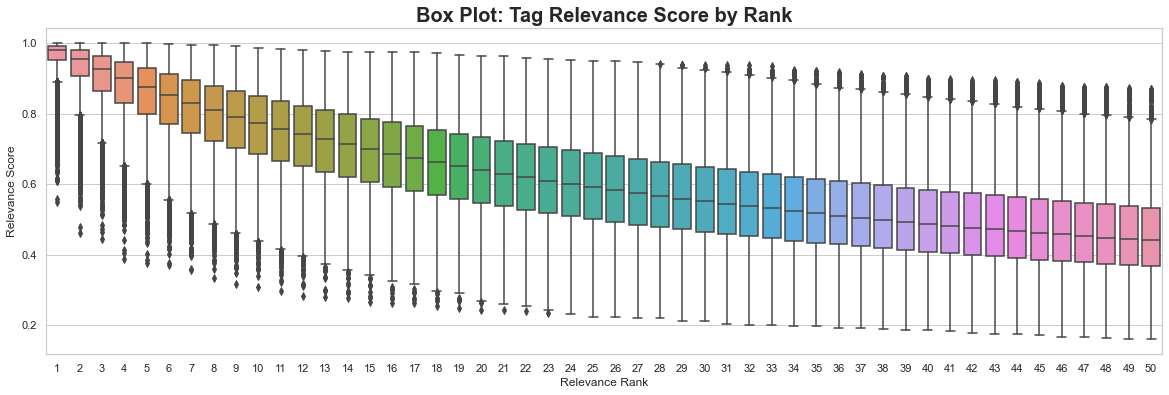

In [ ]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(20, 6))

ax = sns.boxplot(x = "relevance_rank", y = "relevance", data = genome_df[genome_df.relevance_rank <= 50], showfliers = True)
ax.set(ylabel = "Relevance Score")
ax.set(xlabel = "Relevance Rank")
plt.title("Box Plot: Tag Relevance Score by Rank", fontsize = 20, weight = 'bold')

Text(0.5, 1.0, '% Change in Tag Relevance Score by Rank')

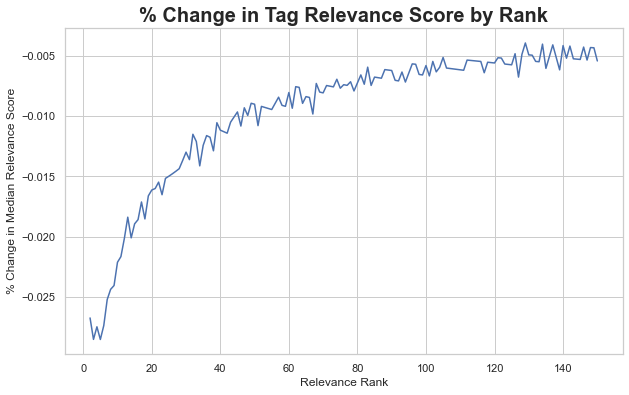

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))

ax = sns.lineplot(x="relevance_rank", y="relevance_median_pct_chg", data = genome_rank)
ax.set(ylabel = "% Change in Median Relevance Score")
ax.set(xlabel = "Relevance Rank")
plt.title("% Change in Tag Relevance Score by Rank", fontsize = 20, weight = 'bold')

In [ ]:
mv_tags_list

movieId                            Title  \
0      1        Toy Story                         
1      2        Jumanji                           
2      3        Grumpier Old Men                  
3      4        Waiting to Exhale                 
4      5        Father of the Bride Part II       
...   ..                                ...       
13811  205072   Zombieland: Double Tap            
13812  205076   Downton Abbey                     
13813  205383   El Camino: A Breaking Bad Movie   
13814  205425   Dave Chappelle: Sticks & Stones   
13815  206499   Between Two Ferns: The Movie      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      tag  
0      3d,action,adventure,affectionate,animal movie,animals,animated,animation,based on book,buddy movie,bullying,cartoon,catastrophe,cgi,chase,childhood,children,classic,clever,colourful,comedy,computer animation,cool,creativity,cute,cute!,destiny,dialogue,dinosaurs,disney,disney animated feature,entertaining,excellent,excellent script,exciting,family,fantasy,fast paced,feel good movie,feel-good,friendship,fun,fun movie,funny,good,good action,good soundtrack,good versus evil,great,great ending,great movie,greed,happy ending,heartwarming,highly quotable,humor,humorous,imagination,imdb top 250,interesting,kids,kids and family,light,masterpiece,mentor,monsters,nostalgic,original,original plot,oscar,oscar (best animated feature),oscar (best directing),oscar (best effects - visual effects),oscar (best picture),oscar (best writing - screenplay written directly for the screen),oscar winner,pixar,pixar animation,quotable,redemption,runaway,saturn award (best special effects),secrets,sentimental,simple,story,storytelling,suprisingly clever,sweet,talky,technology,touching,toys,unlikely friendships,very funny,very good,visual,visually stunning,whimsical,witty                                                                                                           
1      action,action packed,adaptation,adapted from:book,adventure,alone in the world,animal movie,animals,bad cgi,based on a book,based on a video game,based on book,big budget,bullying,catastrophe,cgi,chase,childhood,children,clever,comedy,computer animation,computer game,creativity,destiny,dialogue,dinosaurs,dynamic cgi action,effects,entertaining,exciting,family,fantasy,fantasy world,fast paced,feel good movie,feel-good,fight scenes,fun,fun movie,girlie movie,good,good action,good versus evil,great,great ending,great movie,happy ending,heartwarming,high fantasy,imagination,intense,interesting,jungle,kids,kids and family,life philosophy,light,lions,magic,mentor,monkey,monster,mythology,natural disaster,nostalgic,not funny,original,original plot,oscar (best effects - visual effects),oscar winner,parallel universe,pg,pg-13,predic

In [ ]:
# flatten tags table to get a list of top 100 tags for each movie
mv_tags_list = genome_df[genome_df.relevance_rank <= 100].groupby(['movieId','Title'])['tag'].apply(lambda x: ','.join(x)).reset_index()
mv_tags_list['tag_list'] = mv_tags_list.tag.map(lambda x: x.split(','))
mv_tags_list.head()

movieId                        Title  \
0  1        Toy Story                     
1  2        Jumanji                       
2  3        Grumpier Old Men              
3  4        Waiting to Exhale             
4  5        Father of the Bride Part II   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         tag  \
0  3d,action,adventure,affectionate,animal movie,animals,animated,animation,based on book,buddy movie,bullying,cartoon,catastrophe,cgi,chase,childhood,children,classic,clever,colourful,comedy,computer animation,cool,creativity,cute,cute!,destiny,dialogue,dinosaurs,disney,disney animated feature,entertaining,excellent,excellent script,exciting,family,fantasy,fast paced,feel good movie,feel-good,friendship,fun,fun movie,funny,good,good action,good soundtrack,good versus evil,great,great ending,great movie,greed,happy ending,heartwarming,highly quotable,humor,humorous,imagination,imdb top 250,interesting,kids,kids and family,light,masterpiece,mentor,monsters,nostalgic,original,original plot,oscar,oscar (best animated feature),oscar (best directing),oscar (best effects - visual effects),oscar (best picture),oscar (best writing - screenplay written directly for the screen),oscar winner,pixar,pixar animation,quotable,redemption,runaway,saturn award (best special effects),secrets,sentimental,simple,story,storytelling,suprisingly clever,sweet,talky,technology,touching,toys,unlikely friendships,very funny,very good,visual,visually stunning,whimsical,witty   
1  action,action packed,adaptation,adapted from:book,adventure,alone in the world,animal movie,animals,bad cgi,based on a book,based on a video game,based on book,big budget,bullying,catastrophe,cgi,chase,childhood,children,clever,comedy,computer animation,computer game,creativity,destiny,dialogue,dinosaurs,dynamic cgi action,effects,entertaining,exciting,family,fantasy,fantasy world,fast paced,feel good movie,feel-good,fight scenes,fun,fun movie,girlie movie,good,good action,good versus evil,great,great ending,great movie,happy ending,heartwarming,high fantasy,imagination,intense,interesting,jungle,kids,kids and family,life philosophy,light,lions,magic,mentor,monkey,monster,mythology,natural disaster,nostalgic,not funny,original,original plot,oscar (best effects - visual effects),oscar winner,parallel universe,pg,pg-13,predictable,runaway,sacrifice,saturn award (best special effects),scary,science fiction,scifi,silly fun,special effects,spiders,story,storytelling,supernatural,suspense,swashbuckler,technology,time,time travel,transformation,very interesting,video game,video games,videogame,visual,weird,witches                                        
2  adaptation,adventure,aging,bad plot,betrayal,brutality,catastrophe,chase,comedy,corruption,crappy sequel,creativity,criterion,crude humor,culture clash,death,destiny,dialogue,family,fantasy world,feel good movie,feel-good,fight scenes,fi

## Jacard Index

In [ ]:
# compute Jaccard Index to get most similar movies to target movie

pd.reset_option('display.max_colwidth')

target_movie = 'Toy Story'

target_tag_list = mv_tags_list[mv_tags_list.Title == target_movie].tag_list.values[0]
mv_tags_list_sim = mv_tags_list[['movieId','Title','tag_list','tag']]
mv_tags_list_sim['jaccard_sim'] = mv_tags_list_sim.tag_list.map(lambda x: len(set(x).intersection(set(target_tag_list))) / len(set(x).union(set(target_tag_list))))
print(f'Movies most similar to {target_movie} based on tags:')
text = ','.join(mv_tags_list_sim.sort_values(by = 'jaccard_sim', ascending = False).head(25)['tag'].values)
mv_tags_list_sim.sort_values(by = 'jaccard_sim', ascending = False).head(25)

Movies most similar to Toy Story based on tags:


movieId                                   Title  \
0            1                               Toy Story   
2807      3114                             Toy Story 2   
2094      2355                            A Bug's Life   
4407      4886                          Monsters, Inc.   
8809     50872                             Ratatouille   
10285    78499                             Toy Story 3   
4700      5218                                 Ice Age   
5635      6377                            Finding Nemo   
1839      2078                         The Jungle Book   
7159      8961                         The Incredibles   
3869      4306                                   Shrek   
8519     45517                                    Cars   
558        588                                 Aladdin   
11057    95311                                  Presto   
10521    83803                             Day & Night   
11193    97913                          Wreck-It Ralph   
11080    95858                           For the Birds   
12847   157296                            Finding Dory   
11420   103141                     Monsters University   
10451    81847                                 Tangled   
7821     31193  The Many Adventures of Winnie the Pooh   
349        364                           The Lion King   
3605      4016                The Emperor's New Groove   
10018    72356                           Partly Cloudy   
3361      3751                             Chicken Run   

                                                tag_list  \
0      [3d, action, adventure, affectionate, animal m...   
2807   [action, adventure, animal movie, animals, ani...   
2094   [3d, adventure, animal movie, animals, animate...   
4407   [adventure, affectionate, allegory, animals, a...   
8809   [adventure, allegory, animal movie, animals, a...   
10285  [3d, action, adventure, animals, animated, ani...   
4700   [3d, action, adoption, adventure, animal movie...   
5635   [adventure, animal movie, animals, animated, a...   
1839   [adaptation, adapted from:book, adventure, aff...   
7159   [action, action packed, adventure, affectionat...   
3869   [adventure, affectionate, animal movie, animal...   
8519   [action, adventure, animal movie, animals, ani...   
558    [action, adventure, affectionate, animal movie...   
11057  [aardman studios, adapted from:book, affection...   
10521  [3d, aardman studios, adapted from:book, affec...   
11193  [3d, action, adapted from:game, adventure, alt...   
11080  [aardman studios, adaptation, adapted from:boo...   
12847  [3d, adoption, adventure, animals, animated, a...   
11420  [3d, adventure, allegory, animals, animated, a...   
10451  [3d, adapted from:book, adventure, animal movi...   
7821   [adaptation, adapted from:book, adventure, ani...   
349    [adventure, affectionate, africa, animal movie...   
3605   [adventure, animal movie, animals, animated, a...   
10018  [aardman studios, adapted from:book, animal mo...   
3361   [aardman, aardman studios, adaptation, adventu...   

                                                     tag  jaccard_sim  
0      3d,action,adventure,affectionate,animal movie,...     1.000000  
2807   action,adventure,animal movie,animals,animated...     0.709402  
2094   3d,adventure,animal movie,animals,animated,ani...     0.639344  
4407   adventure,affectionate,allegory,animals,animat...     0.626016  
8809   adventure,allegory,animal movie,animals,animat...     0.562500  
10285  3d,action,adventure,animals,animated,animation...     0.562500  
4700   3d,action,adoption,adventure,animal movie,anim...     0.550388  
5635   adventure,animal movie,animals,animated,animat...     0.550388  
1839   adaptation,adapted from:book,adventure,affecti...     0.538462  
7159   action,action packed,adventure,affectionate,al...     0.526718  
3869   adventure,affectionate,animal movie,animals,an...     0.515152  
8519   action,adventure,animal movie,animals,animated...     0.503759  
5

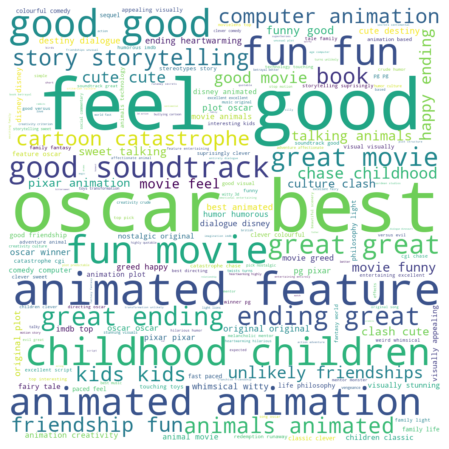

In [ ]:
plt.rcParams["figure.figsize"] = (14,12)

# Generate a word cloud image
wordcloud = WordCloud(width = 1024, height = 1024, background_color = 'white').generate(text)

# Display the generated image:
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Cosine Similarity

In [ ]:
# corpus of movie tags
mv_tags_corpus = mv_tags_list.tag.values

In [ ]:
stop_words = stopwords.words('english')

# tokenize document and clean
def word_tokenize_clean(doc):
  
    # split into lower case word tokens
    tokens = word_tokenize(doc.lower())
  
    # remove tokens that are not alphabetic (including punctuation) and not a stop word
    tokens = [word for word in tokens if word.isalpha() and not word in stop_words]
  
    return tokens

In [ ]:
mv_tags_doc = [TaggedDocument(words=word_tokenize_clean(D), tags=[str(i)]) for i, D in enumerate(mv_tags_corpus)]

In [ ]:
# instantiate Doc2Vec model
max_epochs = 50
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm=0) # paragraph vector distributed bag-of-words (PV-DBOW)
  
model.build_vocab(mv_tags_doc)

In [ ]:
# train Doc2Vec model
# stochastic (random initialization), so each run will be different unless you specify seed
print('Epoch', end = ': ')
for epoch in range(max_epochs):
    print(epoch, end = ' ')
    model.train(mv_tags_doc,
              total_examples=model.corpus_count,
              epochs=model.epochs)
  # decrease the learning rate
model.alpha -= 0.0002
  # fix the learning rate, no decay
model.min_alpha = model.alpha

Epoch: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [ ]:
# listing space embeddings
mv_tags_vectors = model.docvecs.vectors
mv_tags_vectors.shape

(13816, 20)

In [ ]:
# top similar movies based on cosine similarity

mv = 'Toy Story'

mv_index = mv_tags_list[mv_tags_list["Title"] == mv].index.values[0]

print(mv_tags_vectors[mv_index])

sims = model.docvecs.most_similar(positive = [mv_index], topn = 30)

for i, j in sims:
    print(mv_tags_list.loc[int(i), "Title"].strip())

[ 0.90713555  0.5553682  -1.4770066  -0.2324692  -0.3130768  -1.2836745
 -0.4191157   0.32981566 -1.9626762   0.30857036 -0.7235083   0.5283148
  0.57870984 -0.36577445  0.65981257 -0.08018544 -0.01734322  0.83831537
  0.83916533  0.9683226 ]
Presto
Toy Story 2
Shaun the Sheep Movie
Toy Story 3
Winnie the Pooh and Tigger Too
Big
Paperman
Toy Story Toons: Partysaurus Rex
Monsters, Inc.
Geri's Game
Monsters University
Toy Story of Terror
Partly Cloudy
The Blue Umbrella
Rush: Beyond the Lighted Stage
Back to the Future
Ghostbusters (a.k.a. Ghost Busters)
For the Birds
Knick Knack
Toy Story 4
Raiders of the Lost Ark: The Adaptation
House of Small Cubes, The (Tsumiki no ie)
Day & Night
WALL·E
Toy Story That Time Forgot
Winter in Prostokvashino
The Many Adventures of Winnie the Pooh
E.T. the Extra-Terrestrial
Rabbit Seasoning
Toy Story Toons: Hawaiian Vacation


### Recommending based on Genre

In [ ]:
movies.head()

userId  movieId  rating   timestamp  \
0  5163    57669    4.0     1518349992   
1  106343  5        4.5     1206238739   
2  146790  5459     5.0     1076215539   
3  106362  32296    2.0     1423042565   
4  9041    366      3.0     833375837    

                                                                               title_year  \
0  In Bruges (2008)                                                                         
1  Father of the Bride Part II (1995)                                                       
2  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)                                      
3  Miss Congeniality 2: Armed and Fabulous (2005)                                           
4  Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)   

                          genres  \
0  Comedy|Crime|Drama|Thriller     
1  Comedy                          
2  Action|Comedy|Sci-Fi            
3  Adventure|Comedy|Crime          
4  Drama|Horror|Mystery|Thriller   

                                                                             Title  \
0  In Bruges                                                                         
1  Father of the Bride Part II                                                       
2  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2)                                      
3  Miss Congeniality 2: Armed and Fabulous                                           
4  Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A)   

              time_dt  Year  Month  Day  Day of Week  \
0 2018-02-11 12:53:12  2018  2      11   6             
1 2008-03-23 03:18:59  2008  3      23   6             
2 2004-02-08 05:45:39  2004  2      8    6             
3 2015-02-04 10:36:05  2015  2      4    2             
4 1996-05-29 14:17:17  1996  5      29   2             

                                                                             title  \
0  In Bruges                                                                         
1  Father of the Bride Part II                                                       
2  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2)                                      
3  Miss Congeniality 2: Armed and Fabulous                                           
4  Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A)   

   prod_year  
0  2008       
1  1995       
2  2002       
3  2005       
4  1994

In [ ]:
# Group by movieid and title
mv_genre_list = movies.groupby(['movieId','title'])['genres'].apply(lambda x: ','.join(list(set(x)))).reset_index()
mv_genre_list['genres'] = mv_genre_list['genres'].map(lambda x: ','.join(x.split('|')))
mv_genre_list['genre_list'] = mv_genre_list.genres.map(lambda x: [] if x == '(no genres listed)' else x.split(','))
mv_genre_list

movieId                        title  \
0      1        Toy Story                     
1      2        Jumanji                       
2      3        Grumpier Old Men              
3      4        Waiting to Exhale             
4      5        Father of the Bride Part II   
...   ..                                ...   
45839  209145   Liberté                       
45840  209153   Happy Flight                  
45841  209159   Window of the Soul            
45842  209169   A Girl Thing                  
45843  209171   Women of Devil's Island       

                                            genres  \
0      Adventure,Animation,Children,Comedy,Fantasy   
1      Adventure,Children,Fantasy                    
2      Comedy,Romance                                
3      Comedy,Drama,Romance                          
4      Comedy                                        
...       ...                                        
45839  Drama                                         
45840  Comedy,Drama                                  
45841  Documentary                                   
45842  (no genres listed)                            
45843  Action,Adventure,Drama                        

                                              genre_list  
0      [Adventure, Animation, Children, Comedy, Fantasy]  
1      [Adventure, Children, Fantasy]                     
2      [Comedy, Romance]                                  
3      [Comedy, Drama, Romance]                           
4      [Comedy]                                           
...         ...                                           
45839  [Drama]                                            
45840  [Comedy, Drama]                                    
45841  [Documentary]                                      
45842  []                                                 
45843  [Action, Adventure, Drama]                         

[45844 rows x 4 columns]

In [ ]:
#Using Jacard Index

target_movie = 'Toy Story'

target_genre_list = mv_genre_list[mv_genre_list.title == target_movie].genre_list.values[0]
mv_genre_list['jaccard_sim'] = mv_genre_list.genre_list.map(lambda x: len(set(x).intersection(set(target_genre_list))) / len(set(x).union(set(target_genre_list))))
print(f'Movies most similar to {target_movie} based on genres:')
text = ','.join(mv_genre_list.sort_values(by = 'jaccard_sim', ascending = False).head(25))
mv_genre_list.sort_values(by = 'jaccard_sim', ascending = False).head(25)

Movies most similar to Toy Story based on genres:


movieId                                             title  \
0      1        Toy Story                                          
12881  65577    The Tale of Despereaux                             
11550  53121    Shrek the Third                                    
10726  45074    The Wild                                           
24725  131248   Brother Bear 2                                     
43260  196693   Dragons: Dawn Of The Dragon Racers                 
38974  181601   Olaf's Frozen Adventure                            
3911   4016     The Emperor's New Groove                           
19257  103755   Turbo                                              
42218  192981   Penguin Highway                                    
3652   3754     The Adventures of Rocky and Bullwinkle             
44283  200630   Missing Link                                       
44279  200614   Wonder Park                                        
9913   33463    DuckTales: The Movie - Treasure of the Lost Lamp   
4777   4886     Monsters, Inc.                                     
40374  186159   Tangled: Before Ever After                         
40376  186177   Trolls Holiday                                     
3020   3114     Toy Story 2                                        
34315  166461   Moana                                              
21752  117454   The Magic Crystal                                  
2202   2294     Antz                                               
45549  206959   Frozen II                                          
21055  114240   Aladdin                                            
21102  114552   The Boxtrolls                                      
21331  115879   Toy Story Toons: Small Fry                         

                                            genres  \
0      Adventure,Animation,Children,Comedy,Fantasy   
12881  Adventure,Animation,Children,Comedy,Fantasy   
11550  Adventure,Animation,Children,Comedy,Fantasy   
10726  Adventure,Animation,Children,Comedy,Fantasy   
24725  Adventure,Animation,Children,Comedy,Fantasy   
43260  Adventure,Animation,Children,Comedy,Fantasy   
38974  Adventure,Animation,Children,Comedy,Fantasy   
3911   Adventure,Animation,Children,Comedy,Fantasy   
19257  Adventure,Animation,Children,Comedy,Fantasy   
42218  Adventure,Animation,Children,Comedy,Fantasy   
3652   Adventure,Animation,Children,Comedy,Fantasy   
44283  Adventure,Animation,Children,Comedy,Fantasy   
44279  Adventure,Animation,Children,Comedy,Fantasy   
9913   Adventure,Animation,Children,Comedy,Fantasy   
4777   Adventure,Animation,Children,Comedy,Fantasy   
40374  Adventure,Animation,Children,Comedy,Fantasy   
40376  Adventure,Animation,Children,Comedy,Fantasy   
3020   Adventure,Animation,Children,Comedy,Fantasy   
34315  Adventure,Animation,Children,Comedy,Fantasy   
21752  Adventure,Animation,Children,Comedy,Fantasy   
2202   Adventure,Animation,Children,Comedy,Fantasy   
45549  Adventure,Animation,Children,Comedy,Fantasy   
21055  Adventure,Animation,Children,Comedy,Fantasy   
21102  Adventure,Animation,Children,Comedy,Fantasy   
21331  Adventure,Animation,Children,Comedy,Fantasy   

                                              genre_list  jaccard_sim  
0      [Adventure, Animation, Children, Comedy, Fantasy]  1.0          
12881  [Adventure, Animation, Children, Comedy, Fantasy]  1.0          
11550  [Adventure, Animation, Children, Comedy, Fantasy]  1.0          
10726  [Adventure, Animation, Children, Comedy, Fantasy]  1.0          
24725  [Adventure, Animation, Children, Comedy, Fantasy]  1.0          
43260  [Adventure, Animation, Children, Comedy, Fantasy]  1.0          
38974  [Adventure, Animation, Children, Comedy, Fantasy]  1.0          
3911   [Adventure, Animation, Children, Comedy, Fantasy]  1.0          
19257  [Adventure, Animation, Children, Comedy, Fantasy]  1.0          
42218  [Adventure, Animation, Children, Comedy, Fantasy]  1.0          
3652   [Adventure, Animation, Children, C

In [ ]:
#Using Cosine similarity
# corpus of movie tags
mv_genre_corpus = mv_genre_list.genres.values

mv_genre_doc = [TaggedDocument(words=word_tokenize_clean(D), tags=[str(i)]) for i, D in enumerate(mv_genre_corpus)]

# instantiate Doc2Vec model
max_epochs = 50
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm=0) # paragraph vector distributed bag-of-words (PV-DBOW)
  
model.build_vocab(mv_genre_doc)

# train Doc2Vec model
# stochastic (random initialization), so each run will be different unless you specify seed
print('Epoch', end = ': ')
for epoch in range(max_epochs):
    print(epoch, end = ' ')
    model.train(mv_tags_doc,
              total_examples=model.corpus_count,
              epochs=model.epochs)
  # decrease the learning rate
model.alpha -= 0.0002
  # fix the learning rate, no decay
model.min_alpha = model.alpha

# listing space embeddings
mv_genre_vectors = model.docvecs.vectors
print(mv_genre_vectors.shape)

# top similar movies based on cosine similarity
mv = 'Toy Story'

mv_index = mv_genre_list[mv_genre_list["title"] == mv].index.values[0]

print(mv_genre_vectors[mv_index])

sims = model.docvecs.most_similar(positive = [mv_index], topn = 30)

for i, j in sims:
    print(mv_genre_list.loc[int(i), "title"].strip())

Epoch: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 (45844, 20)
[-0.05994622  0.5860835   0.2520635   0.21941815 -0.5267583   0.08675691
  0.3549271  -0.10732172  0.13385929 -0.15113878 -0.4152459   0.41501677
  0.05043086  0.9000713  -0.27087235 -0.13433893 -0.36353415  0.22000237
  0.0690873   0.14152393]
Short Film About Love, A (Krótki film o milosci)
Cosas que nunca te dije (Things I Never Told You)
Spider-Man 2
The Adventures of Priscilla, Queen of the Desert
The Visit
Carve Her Name with Pride
McCabe & Mrs. Miller
District 13 (Banlieue 13)
End of the Century: The Story of the Ramones
After School Special (a.k.a. Barely Legal)
Re-cycle (Gwai wik)
Turtles Can Fly (Lakposhtha hâm parvaz mikonand)
Phantom Lady
17 Again
Seventh Continent, The (Der siebente Kontinent)
Paris Blues
Jacknife
Laura
Barbarian Invasions, The (Les invasions barbares)
Just Another Love Story (Kærlighed på film)
Fath

### Predicting based on history of a particular user

In [ ]:
# history of movies the user watched and liked
user_movies = ['Interstellar','Good Will Hunting','Gattaca',
               'Almost Famous','The Shawshank Redemption','Edge of Tomorrow',
               'Jerry Maguire','Forrest Gump','Back to the Future']

# compute user vector as an average of movie vectors seen by that user
user_movie_vector = np.zeros(shape = mv_tags_vectors.shape[1])
for mv in user_movies:
    mv_index = mv_tags_list[mv_tags_list["Title"] == mv].index.values[0]  
    user_movie_vector += mv_tags_vectors[mv_index]

user_movie_vector /= len(user_movies)  

# print(user_movie_vector)
  
#  find movies similar to user vector to generate movie recommendations

print('Movie Recommendations:')

sims = model.docvecs.most_similar(positive = [user_movie_vector], topn = 30)

for i, j in sims:
    movie_sim = mv_tags_list.loc[int(i), "Title"].strip()
    if movie_sim not in user_movies:
        print(movie_sim)